## import necessary libraries

In [1]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

## implement helper functions

In [79]:
# TODO: Implement the distance function
def distance(city1, city2):
    """Calculate Euclidean distance between two cities."""
    x1, y1 = city1
    x2, y2 = city2
    d = math.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    return d

# TODO: Implement the fitness function
def fitness(route, cities):
    """Calculate the total distance of the route. Lower is better."""
    total_dist = 0
    for i in range(1, len(route)):
        total_dist += distance(cities[route[i]], cities[route[i-1]])
    total_dist += distance(cities[route[len(route) - 1]], cities[route[0]])
    return total_dist

# TODO: Initialize the population
def initialize_population(size, num_cities):
    """Generate a population of random permutations of cities."""
    permutations = [np.arange(num_cities) for _ in range(size)]
    for array in permutations:
        np.random.shuffle(array)
    return permutations

# TODO: Implement selection
def select_parents(population, fitness_scores):
    """Select a parent solution based on fitness scores."""
    total_fitness = np.sum(fitness_scores)
    normalized_fitness = total_fitness - fitness_scores
    normalized_fitness = normalized_fitness / np.sum(normalized_fitness)
    indices = np.arange(len(normalized_fitness))

    selected_parents = []
    for _ in range(len(population)):
        chosen_index = np.random.choice(indices, p=normalized_fitness)
        selected_parents.append(population[chosen_index])
    
    return select_parents
    

# TODO: Implement crossover
def crossover(parent1, parent2):
    """Generate two offspring using ordered crossover (OX)."""
    points = np.random.choice(np.arange(len(parent1)), size=2, replace=False)
    point1 = min(points[0], points[1])
    point2 = max(points[0], points[1])
    child1 = np.zeros(len(parent1), dtype=int)
    child2 = np.zeros(len(parent2), dtype=int)
    set1 = set(parent2[point1:point2])
    set2 = set(parent1[point1:point2])
    for i in range(len(parent1)):
        index1 = 0
        index2 = 0
        if i < point1 or i >= point2:
            while(parent1[index1] in set1):
                index1 += 1
            set1.add(parent1[index1])
            while(parent2[index2] in set2):
                index2 += 1
            set2.add(parent2[index2])
            child1[i] = parent1[index1]
            child2[i] = parent2[index2]
    child1[point1:point2] = parent2[point1:point2]
    child2[point1:point2] = parent1[point1:point2]
    return child1, child2

# TODO: Implement mutation
def mutate(route, mutation_rate):
    """Introduce a random mutation in the route."""
    if np.random.rand() < mutation_rate:    
        points = np.random.choice(np.arange(len(route)), size=2, replace=False)
        point1 = min(points[0], points[1])
        point2 = max(points[0], points[1])
        route[[point1, point2]] = route[[point2, point1]]
    return route

# Visualization Function
def visualize_route(route, cities, generation):
    """Plot the current best route."""
    x = [cities[i][0] for i in route] + [cities[route[0]][0]]
    y = [cities[i][1] for i in route] + [cities[route[0]][1]]

    plt.figure(figsize=(6, 6))
    plt.plot(x, y, '-o', label=f'Generation {generation}')
    plt.title(f"Route Visualization (Generation {generation})")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend()
    plt.grid(True)
    plt.show()

## implement the GA and main loop

In [102]:
# TODO: Implement the Genetic Algorithm
def genetic_algorithm(cities, population_size=100, generations=300, mutation_rate=0.01):
    """Genetic Algorithm Main Loop"""

    num_cities = len(cities)
    population = initialize_population(population_size, num_cities)
    best_routes = []  # To track the best route per generation

    for generation in range(generations):
        # TODO: Evaluate fitness for the current population
        fitness_scores = np.zeros(population_size)
        for i, route in enumerate(population):
            fitness_scores[i] = fitness(route, cities)
        
        # TODO: Track the best route of the current generation
        best_route = population[np.argmin(fitness_scores)]
        best_routes.append(best_route)

        # Log the best fitness
        print(f"Generation {generation}: Best Fitness = {fitness(best_route, cities)}")

        # TODO: Generate the next generation
        selected_parents = select_parents(population, fitness_scores)
        for i in range(0, population_size, 2):
            child1, child2 = crossover(population[i], population[i+1])
            population[i] = child1
            population[i+1] = child2
            population[i] = mutate(population[i], mutation_rate)
            population[i+1] = mutate(population[i+1], mutation_rate)

        # Visualize the best route every 25 generations
        if generation % 25 == 0 or generation == generations - 1:
            visualize_route(best_route, cities, generation)

    # TODO: Return the best route and its distance

    best = best_routes[0]
    dist = fitness(best, cities)
    for i in range(1, generations):
        fit = fitness(best_routes[i], cities)
        if fit < dist:
            best = best_routes[i]
            dist = fit
    return best, dist

## Run and test with different cities

### test 1

Generation 0: Best Fitness = 92.58519307559176


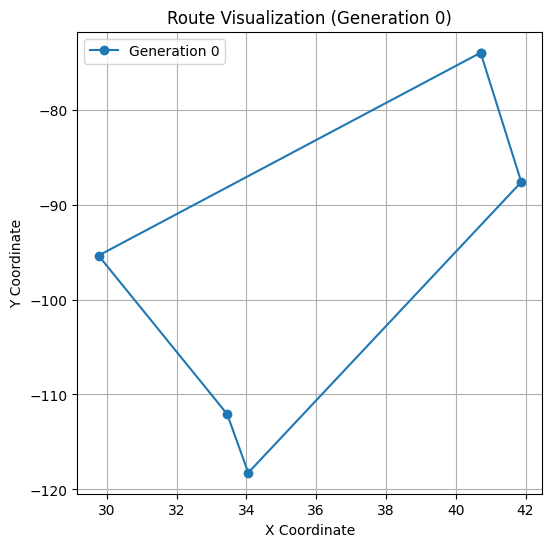

Generation 1: Best Fitness = 92.58519307559176
Generation 2: Best Fitness = 92.58519307559176
Generation 3: Best Fitness = 92.58519307559176
Generation 4: Best Fitness = 92.58519307559176
Generation 5: Best Fitness = 92.58519307559176
Generation 6: Best Fitness = 92.58519307559176
Generation 7: Best Fitness = 92.58519307559176
Generation 8: Best Fitness = 92.58519307559176
Generation 9: Best Fitness = 92.58519307559176
Generation 10: Best Fitness = 92.58519307559176
Generation 11: Best Fitness = 92.58519307559176
Generation 12: Best Fitness = 92.58519307559176
Generation 13: Best Fitness = 92.58519307559176
Generation 14: Best Fitness = 92.58519307559176
Generation 15: Best Fitness = 92.58519307559176
Generation 16: Best Fitness = 92.58519307559176
Generation 17: Best Fitness = 92.58519307559176
Generation 18: Best Fitness = 92.58519307559176
Generation 19: Best Fitness = 92.58519307559176
Generation 20: Best Fitness = 92.58519307559176
Generation 21: Best Fitness = 92.58519307559176
G

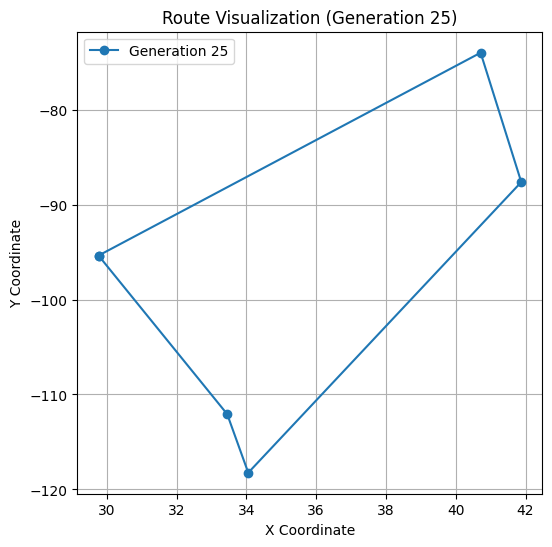

Generation 26: Best Fitness = 92.58519307559176
Generation 27: Best Fitness = 92.58519307559176
Generation 28: Best Fitness = 92.58519307559176
Generation 29: Best Fitness = 92.58519307559176
Generation 30: Best Fitness = 92.58519307559176
Generation 31: Best Fitness = 92.58519307559176
Generation 32: Best Fitness = 92.58519307559176
Generation 33: Best Fitness = 92.58519307559176
Generation 34: Best Fitness = 92.58519307559176
Generation 35: Best Fitness = 92.58519307559176
Generation 36: Best Fitness = 92.58519307559176
Generation 37: Best Fitness = 92.58519307559176
Generation 38: Best Fitness = 92.58519307559176
Generation 39: Best Fitness = 92.58519307559176
Generation 40: Best Fitness = 92.58519307559176
Generation 41: Best Fitness = 92.58519307559176
Generation 42: Best Fitness = 92.58519307559176
Generation 43: Best Fitness = 92.58519307559176
Generation 44: Best Fitness = 92.58519307559176
Generation 45: Best Fitness = 92.58519307559176
Generation 46: Best Fitness = 92.5851930

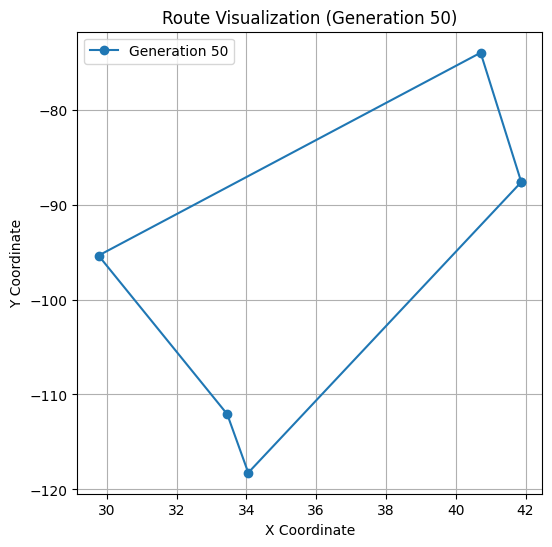

Generation 51: Best Fitness = 92.58519307559176
Generation 52: Best Fitness = 92.58519307559176
Generation 53: Best Fitness = 92.58519307559176
Generation 54: Best Fitness = 92.58519307559176
Generation 55: Best Fitness = 92.58519307559176
Generation 56: Best Fitness = 92.58519307559176
Generation 57: Best Fitness = 92.58519307559176
Generation 58: Best Fitness = 92.58519307559176
Generation 59: Best Fitness = 92.58519307559176
Generation 60: Best Fitness = 92.58519307559176
Generation 61: Best Fitness = 92.58519307559176
Generation 62: Best Fitness = 92.58519307559176
Generation 63: Best Fitness = 92.58519307559176
Generation 64: Best Fitness = 92.58519307559176
Generation 65: Best Fitness = 92.58519307559176
Generation 66: Best Fitness = 92.58519307559176
Generation 67: Best Fitness = 92.58519307559176
Generation 68: Best Fitness = 92.58519307559176
Generation 69: Best Fitness = 92.58519307559176
Generation 70: Best Fitness = 92.58519307559176
Generation 71: Best Fitness = 92.5851930

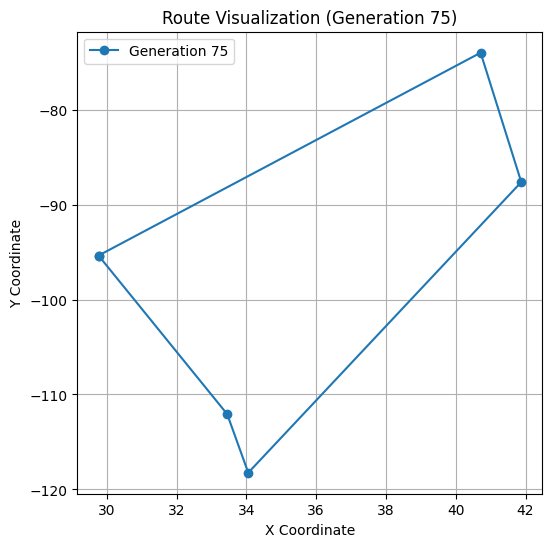

Generation 76: Best Fitness = 92.58519307559176
Generation 77: Best Fitness = 92.58519307559176
Generation 78: Best Fitness = 92.58519307559176
Generation 79: Best Fitness = 92.58519307559176
Generation 80: Best Fitness = 92.58519307559176
Generation 81: Best Fitness = 92.58519307559176
Generation 82: Best Fitness = 92.58519307559176
Generation 83: Best Fitness = 92.58519307559176
Generation 84: Best Fitness = 92.58519307559176
Generation 85: Best Fitness = 92.58519307559176
Generation 86: Best Fitness = 92.58519307559176
Generation 87: Best Fitness = 92.58519307559176
Generation 88: Best Fitness = 92.58519307559176
Generation 89: Best Fitness = 92.58519307559176
Generation 90: Best Fitness = 92.58519307559176
Generation 91: Best Fitness = 92.58519307559176
Generation 92: Best Fitness = 92.58519307559176
Generation 93: Best Fitness = 92.58519307559176
Generation 94: Best Fitness = 92.58519307559176
Generation 95: Best Fitness = 92.58519307559176
Generation 96: Best Fitness = 92.5851930

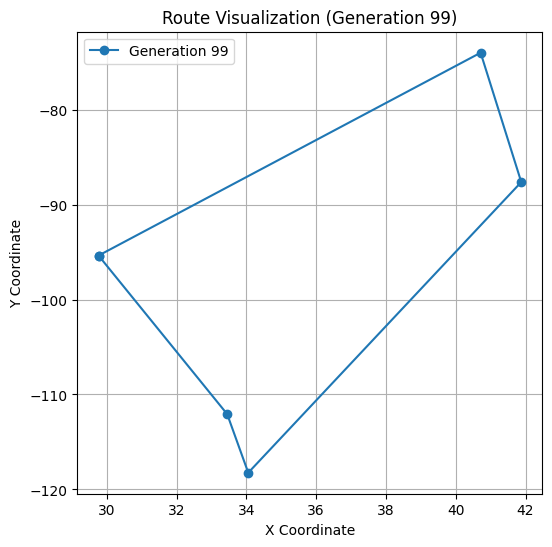

Best Route: [0 2 1 4 3]
Best Distance: 92.58519307559176


In [106]:
cities = [
    (40.7128, -74.0060),  # New York
    (34.0522, -118.2437),  # Los Angeles
    (41.8781, -87.6298),  # Chicago
    (29.7604, -95.3698),  # Houston
    (33.4484, -112.0740)  # Phoenix
]

# Run the Genetic Algorithm
best_route, best_distance = genetic_algorithm(cities, generations=100)
print("Best Route:", best_route)
print("Best Distance:", best_distance)

### test 2

Generation 0: Best Fitness = 57.33990965352703


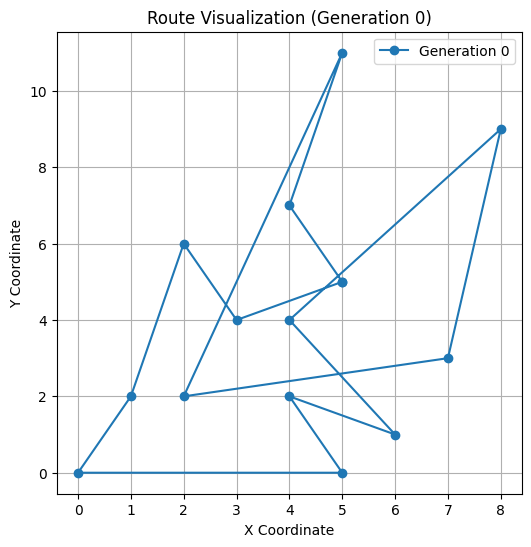

Generation 1: Best Fitness = 55.82067272054603
Generation 2: Best Fitness = 51.54815537553081
Generation 3: Best Fitness = 51.60420981454777
Generation 4: Best Fitness = 53.81697368220178
Generation 5: Best Fitness = 53.473407549674796
Generation 6: Best Fitness = 53.89158076607596
Generation 7: Best Fitness = 52.824479643321474
Generation 8: Best Fitness = 51.64207392071635
Generation 9: Best Fitness = 52.15962827087002
Generation 10: Best Fitness = 51.64207392071635
Generation 11: Best Fitness = 52.15962827087002
Generation 12: Best Fitness = 50.28097285907361
Generation 13: Best Fitness = 52.15962827087002
Generation 14: Best Fitness = 52.15962827087002
Generation 15: Best Fitness = 59.55063343665133
Generation 16: Best Fitness = 60.84484803189568
Generation 17: Best Fitness = 59.53720289465527
Generation 18: Best Fitness = 53.55437026030923
Generation 19: Best Fitness = 56.800965918063284
Generation 20: Best Fitness = 47.044766339575546
Generation 21: Best Fitness = 47.044766339575

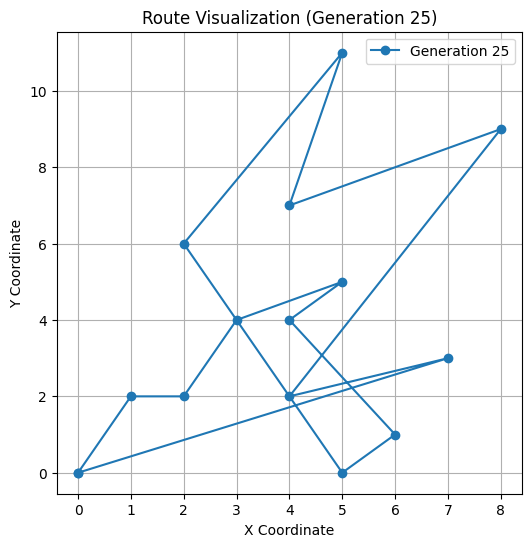

Generation 26: Best Fitness = 51.04042200287128
Generation 27: Best Fitness = 48.19657019751277
Generation 28: Best Fitness = 51.10403370158511
Generation 29: Best Fitness = 48.786701252581764
Generation 30: Best Fitness = 49.489020606206836
Generation 31: Best Fitness = 46.854933340055
Generation 32: Best Fitness = 46.854933340055
Generation 33: Best Fitness = 46.670168336583586
Generation 34: Best Fitness = 46.62597519867995
Generation 35: Best Fitness = 46.292812794002955
Generation 36: Best Fitness = 46.62597519867995
Generation 37: Best Fitness = 45.92365584505488
Generation 38: Best Fitness = 45.92365584505488
Generation 39: Best Fitness = 49.765275098018655
Generation 40: Best Fitness = 49.765275098018655
Generation 41: Best Fitness = 54.44644015693995
Generation 42: Best Fitness = 56.424960550043686
Generation 43: Best Fitness = 52.66175898761019
Generation 44: Best Fitness = 51.94986477886216
Generation 45: Best Fitness = 51.84996510896633
Generation 46: Best Fitness = 49.6755

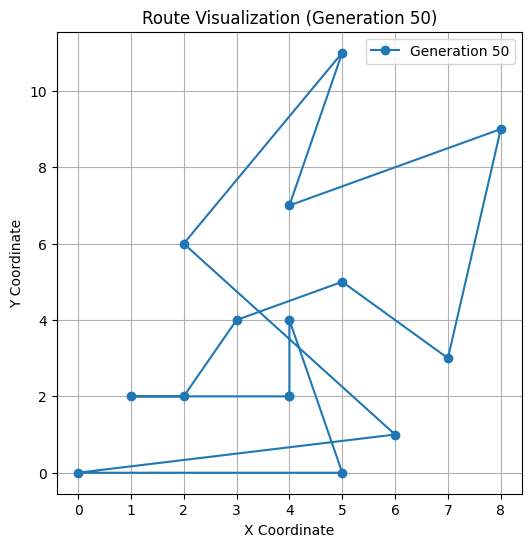

Generation 51: Best Fitness = 55.41851147885525
Generation 52: Best Fitness = 54.524710523703185
Generation 53: Best Fitness = 53.448338281318335
Generation 54: Best Fitness = 49.83926315071689
Generation 55: Best Fitness = 46.44006961596797
Generation 56: Best Fitness = 53.14074349189259
Generation 57: Best Fitness = 56.90035173520909
Generation 58: Best Fitness = 58.09497515212541
Generation 59: Best Fitness = 56.16841935395657
Generation 60: Best Fitness = 56.91921315908649
Generation 61: Best Fitness = 54.76108509234167
Generation 62: Best Fitness = 56.91921315908649
Generation 63: Best Fitness = 54.05781788738065
Generation 64: Best Fitness = 49.72248258178807
Generation 65: Best Fitness = 49.72248258178807
Generation 66: Best Fitness = 49.72248258178807
Generation 67: Best Fitness = 51.99504904210331
Generation 68: Best Fitness = 51.99504904210331
Generation 69: Best Fitness = 52.059544144349296
Generation 70: Best Fitness = 52.059544144349296
Generation 71: Best Fitness = 57.734

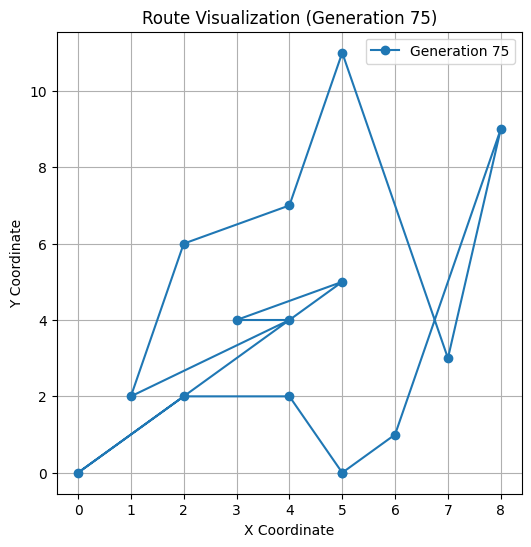

Generation 76: Best Fitness = 53.84988142510781
Generation 77: Best Fitness = 51.8052439603813
Generation 78: Best Fitness = 55.4488599909523
Generation 79: Best Fitness = 52.649928068422064
Generation 80: Best Fitness = 53.52041320702866
Generation 81: Best Fitness = 53.52041320702866
Generation 82: Best Fitness = 48.22294259828138
Generation 83: Best Fitness = 47.654575691625965
Generation 84: Best Fitness = 50.21928626850939
Generation 85: Best Fitness = 54.6534820555449
Generation 86: Best Fitness = 52.79337782613419
Generation 87: Best Fitness = 55.48351953130299
Generation 88: Best Fitness = 54.94816055641637
Generation 89: Best Fitness = 52.79337782613419
Generation 90: Best Fitness = 55.48351953130299
Generation 91: Best Fitness = 57.32963448283953
Generation 92: Best Fitness = 57.16750890887166
Generation 93: Best Fitness = 59.03989624046258
Generation 94: Best Fitness = 55.41860575300124
Generation 95: Best Fitness = 57.688269343524624
Generation 96: Best Fitness = 54.9481605

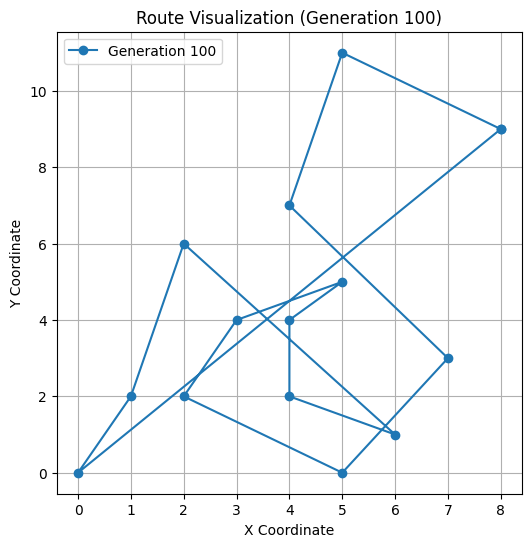

Generation 101: Best Fitness = 53.125618010544486
Generation 102: Best Fitness = 56.132190720163976
Generation 103: Best Fitness = 53.125618010544486
Generation 104: Best Fitness = 53.77174884293502
Generation 105: Best Fitness = 53.347697869040665
Generation 106: Best Fitness = 56.000361131000346
Generation 107: Best Fitness = 55.04387157194686
Generation 108: Best Fitness = 57.23007889337966
Generation 109: Best Fitness = 53.51484653394776
Generation 110: Best Fitness = 51.94121891491148
Generation 111: Best Fitness = 55.596761167165226
Generation 112: Best Fitness = 53.63477606076902
Generation 113: Best Fitness = 53.48996664966239
Generation 114: Best Fitness = 56.84186454346151
Generation 115: Best Fitness = 55.76055903850899
Generation 116: Best Fitness = 57.37631616703507
Generation 117: Best Fitness = 57.00979400104828
Generation 118: Best Fitness = 56.27434926865931
Generation 119: Best Fitness = 52.534275116568026
Generation 120: Best Fitness = 55.174772600882086
Generation 1

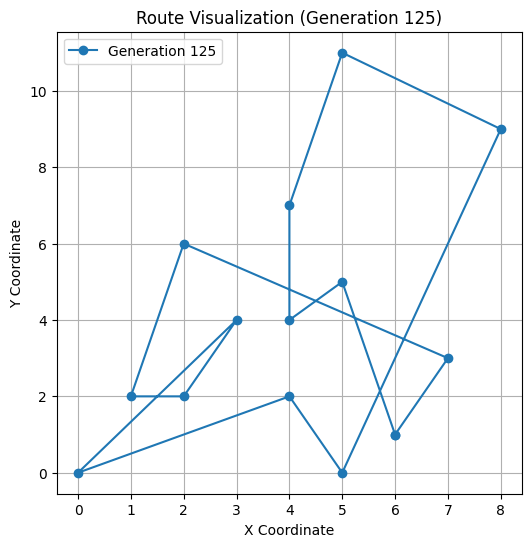

Generation 126: Best Fitness = 56.27302455953435
Generation 127: Best Fitness = 56.85784696900906
Generation 128: Best Fitness = 56.641493377737234
Generation 129: Best Fitness = 55.5134017438181
Generation 130: Best Fitness = 54.30098012256458
Generation 131: Best Fitness = 54.30098012256458
Generation 132: Best Fitness = 52.516863770701676
Generation 133: Best Fitness = 55.42161202375073
Generation 134: Best Fitness = 48.49964125534672
Generation 135: Best Fitness = 53.94531437398963
Generation 136: Best Fitness = 51.53486921430999
Generation 137: Best Fitness = 47.94251006706358
Generation 138: Best Fitness = 53.19690819136324
Generation 139: Best Fitness = 53.397132889459535
Generation 140: Best Fitness = 54.539953036410544
Generation 141: Best Fitness = 52.81884755706324
Generation 142: Best Fitness = 53.456822735772285
Generation 143: Best Fitness = 52.77879771585799
Generation 144: Best Fitness = 53.47017637669718
Generation 145: Best Fitness = 54.63196617514213
Generation 146: 

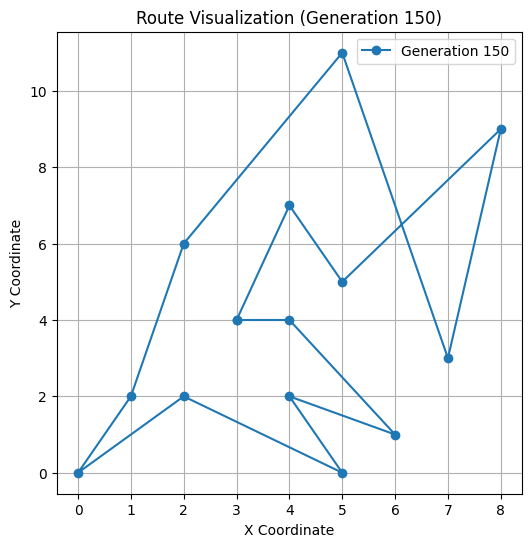

Generation 151: Best Fitness = 47.44429034179794
Generation 152: Best Fitness = 52.68342891550607
Generation 153: Best Fitness = 54.404747785570834
Generation 154: Best Fitness = 55.60518297838033
Generation 155: Best Fitness = 53.407729903395094
Generation 156: Best Fitness = 56.611262264046
Generation 157: Best Fitness = 53.887532826555585
Generation 158: Best Fitness = 54.69386264494433
Generation 159: Best Fitness = 53.887532826555585
Generation 160: Best Fitness = 53.407729903395094
Generation 161: Best Fitness = 49.70938724168228
Generation 162: Best Fitness = 57.41764832913597
Generation 163: Best Fitness = 55.06012020371898
Generation 164: Best Fitness = 57.55020893617461
Generation 165: Best Fitness = 52.55857812773452
Generation 166: Best Fitness = 52.55857812773452
Generation 167: Best Fitness = 52.55857812773452
Generation 168: Best Fitness = 50.51268903410003
Generation 169: Best Fitness = 52.399726682217896
Generation 170: Best Fitness = 50.51268903410003
Generation 171: 

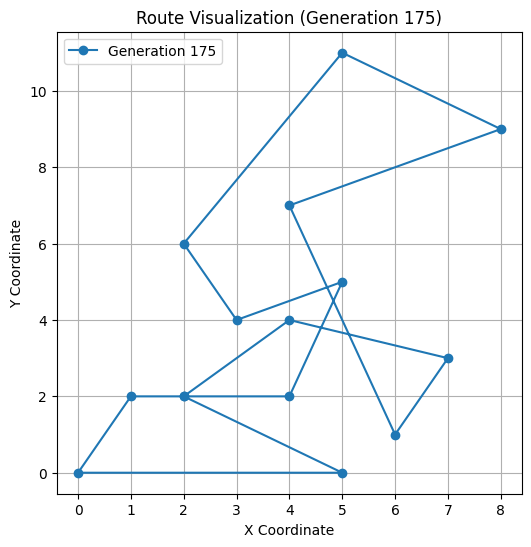

Generation 176: Best Fitness = 53.35767933250076
Generation 177: Best Fitness = 49.75123507272033
Generation 178: Best Fitness = 56.109943641726886
Generation 179: Best Fitness = 55.81705925071023
Generation 180: Best Fitness = 55.81705925071023
Generation 181: Best Fitness = 57.22363949112217
Generation 182: Best Fitness = 57.22363949112217
Generation 183: Best Fitness = 57.102224174859025
Generation 184: Best Fitness = 56.346705680811716
Generation 185: Best Fitness = 55.150942851748376
Generation 186: Best Fitness = 56.62689412675661
Generation 187: Best Fitness = 54.977222382847515
Generation 188: Best Fitness = 55.26695405811256
Generation 189: Best Fitness = 55.26695405811256
Generation 190: Best Fitness = 51.358713828833764
Generation 191: Best Fitness = 52.29536181082428
Generation 192: Best Fitness = 50.19452705958763
Generation 193: Best Fitness = 53.61066570837631
Generation 194: Best Fitness = 53.61066570837631
Generation 195: Best Fitness = 50.80632469565499
Generation 196

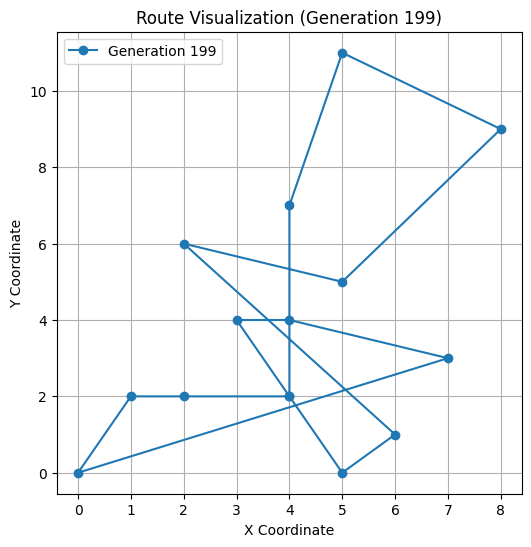

Best Route: [ 0  8 11 12  3  6  5 13 10  7  4  2  9  1]
Best Distance: 45.92365584505488


In [110]:
cities = [
    (0, 0), (1, 2), (3, 4), (6, 1), (5, 5), (2, 6), (4, 7), (7, 3), (4, 4), (2, 2), (8, 9), (4, 2), (5, 0), (5, 11),
]

# Run the Genetic Algorithm
best_route, best_distance = genetic_algorithm(cities, generations=200, mutation_rate=0.1)
print("Best Route:", best_route)
print("Best Distance:", best_distance)

test 2(additional)

Generation 0: Best Fitness = 51.414155766105864


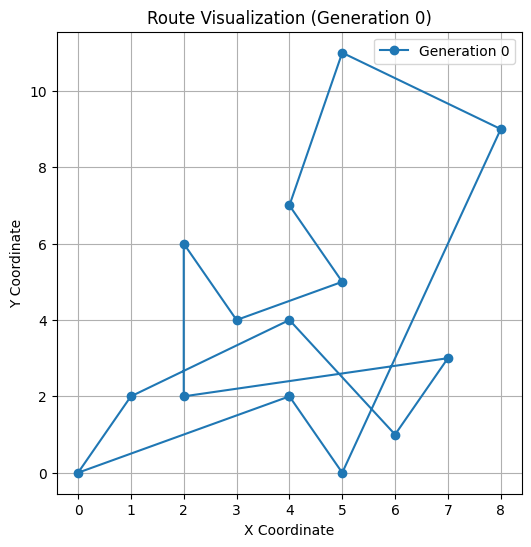

Generation 1: Best Fitness = 52.040883507927674
Generation 2: Best Fitness = 51.77608372237505
Generation 3: Best Fitness = 52.7751216938325
Generation 4: Best Fitness = 54.086058771975054
Generation 5: Best Fitness = 54.191233207845066
Generation 6: Best Fitness = 55.02179604410074
Generation 7: Best Fitness = 55.19591655276151
Generation 8: Best Fitness = 56.962050460447685
Generation 9: Best Fitness = 56.4851426953228
Generation 10: Best Fitness = 50.646280121494904
Generation 11: Best Fitness = 50.646280121494904
Generation 12: Best Fitness = 51.86170394661068
Generation 13: Best Fitness = 54.17753355204112
Generation 14: Best Fitness = 54.091413155159955
Generation 15: Best Fitness = 54.275116969891435
Generation 16: Best Fitness = 54.98363413224542
Generation 17: Best Fitness = 56.14452352943316
Generation 18: Best Fitness = 56.4405023085193
Generation 19: Best Fitness = 54.884587836006446
Generation 20: Best Fitness = 50.603190955572266
Generation 21: Best Fitness = 56.594413149

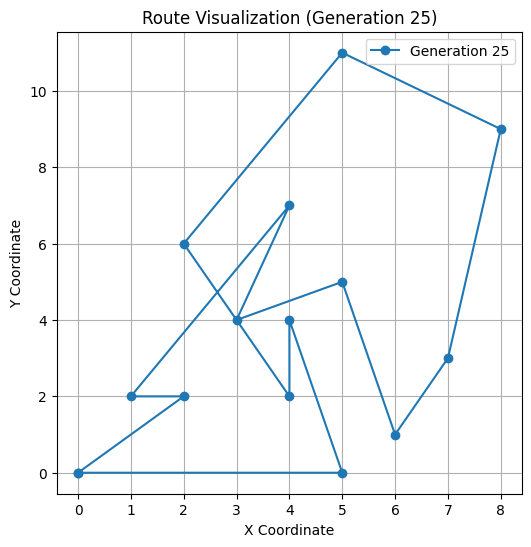

Generation 26: Best Fitness = 53.03890348027927
Generation 27: Best Fitness = 54.39108402501363
Generation 28: Best Fitness = 53.03890348027927
Generation 29: Best Fitness = 54.62325508938126
Generation 30: Best Fitness = 53.68269781869731
Generation 31: Best Fitness = 54.026704112244985
Generation 32: Best Fitness = 53.71907079387195
Generation 33: Best Fitness = 51.14822683948876
Generation 34: Best Fitness = 51.14822683948876
Generation 35: Best Fitness = 50.90798565571678
Generation 36: Best Fitness = 51.941052493800264
Generation 37: Best Fitness = 50.90798565571678
Generation 38: Best Fitness = 49.858670508999886
Generation 39: Best Fitness = 50.16470031925553
Generation 40: Best Fitness = 49.124486670167386
Generation 41: Best Fitness = 55.23206789190327
Generation 42: Best Fitness = 53.594850162233925
Generation 43: Best Fitness = 50.370416918941814
Generation 44: Best Fitness = 56.18416772809824
Generation 45: Best Fitness = 49.55590999985847
Generation 46: Best Fitness = 45.1

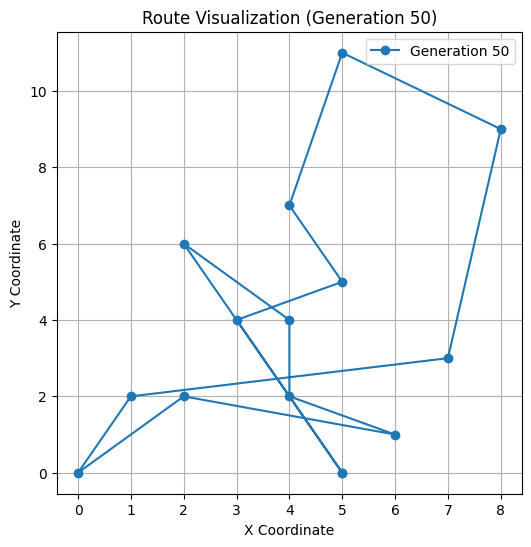

Generation 51: Best Fitness = 50.66528897570061
Generation 52: Best Fitness = 49.07292982845421
Generation 53: Best Fitness = 52.6738540623165
Generation 54: Best Fitness = 52.35527707168214
Generation 55: Best Fitness = 52.758155800389204
Generation 56: Best Fitness = 53.5384335340588
Generation 57: Best Fitness = 49.51517839290446
Generation 58: Best Fitness = 54.16450660179884
Generation 59: Best Fitness = 54.02299579698719
Generation 60: Best Fitness = 53.00646346258879
Generation 61: Best Fitness = 53.64484016444955
Generation 62: Best Fitness = 53.11772950042753
Generation 63: Best Fitness = 51.06231458325463
Generation 64: Best Fitness = 52.643400517394795
Generation 65: Best Fitness = 50.655035251602456
Generation 66: Best Fitness = 48.901412923948996
Generation 67: Best Fitness = 49.42963463222115
Generation 68: Best Fitness = 51.18325695987461
Generation 69: Best Fitness = 47.45454824537558
Generation 70: Best Fitness = 47.60860771822401
Generation 71: Best Fitness = 52.08262

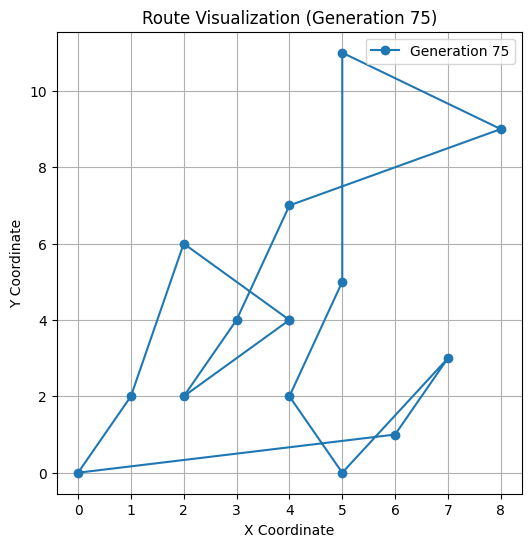

Generation 76: Best Fitness = 52.83148078370586
Generation 77: Best Fitness = 52.560954451330275
Generation 78: Best Fitness = 52.83148078370586
Generation 79: Best Fitness = 46.80743067476462
Generation 80: Best Fitness = 52.19730447267607
Generation 81: Best Fitness = 52.19730447267607
Generation 82: Best Fitness = 50.03736729088397
Generation 83: Best Fitness = 52.560954451330275
Generation 84: Best Fitness = 50.03736729088397
Generation 85: Best Fitness = 52.83148078370586
Generation 86: Best Fitness = 52.379832376001225
Generation 87: Best Fitness = 52.698745621051934
Generation 88: Best Fitness = 52.379832376001225
Generation 89: Best Fitness = 50.5432183781907
Generation 90: Best Fitness = 48.457670632853024
Generation 91: Best Fitness = 46.55671575089245
Generation 92: Best Fitness = 48.457670632853024
Generation 93: Best Fitness = 46.15053484348776
Generation 94: Best Fitness = 51.63215733679558
Generation 95: Best Fitness = 52.379832376001225
Generation 96: Best Fitness = 48.

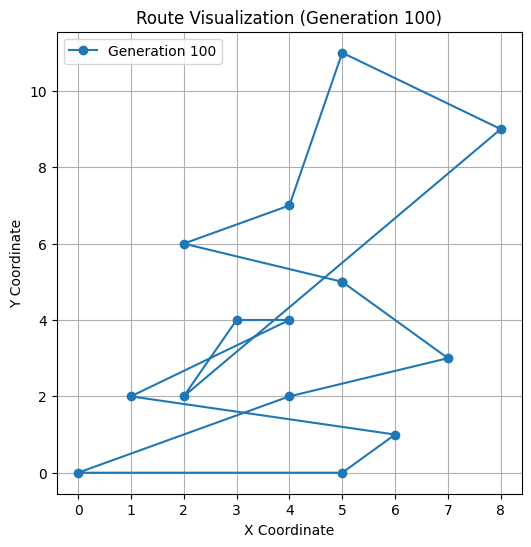

Generation 101: Best Fitness = 46.87145826496714
Generation 102: Best Fitness = 51.41523028887542
Generation 103: Best Fitness = 52.90323416857993
Generation 104: Best Fitness = 53.684375128280145
Generation 105: Best Fitness = 51.776755875782406
Generation 106: Best Fitness = 50.246549947723906
Generation 107: Best Fitness = 51.324237178187474
Generation 108: Best Fitness = 53.59208295488121
Generation 109: Best Fitness = 52.1956756284885
Generation 110: Best Fitness = 54.03847738845093
Generation 111: Best Fitness = 53.46369753851157
Generation 112: Best Fitness = 52.57221059434557
Generation 113: Best Fitness = 52.57221059434557
Generation 114: Best Fitness = 52.57221059434557
Generation 115: Best Fitness = 53.15436348963267
Generation 116: Best Fitness = 52.57221059434557
Generation 117: Best Fitness = 52.57221059434557
Generation 118: Best Fitness = 52.57221059434557
Generation 119: Best Fitness = 52.2253793265114
Generation 120: Best Fitness = 52.57221059434557
Generation 121: Be

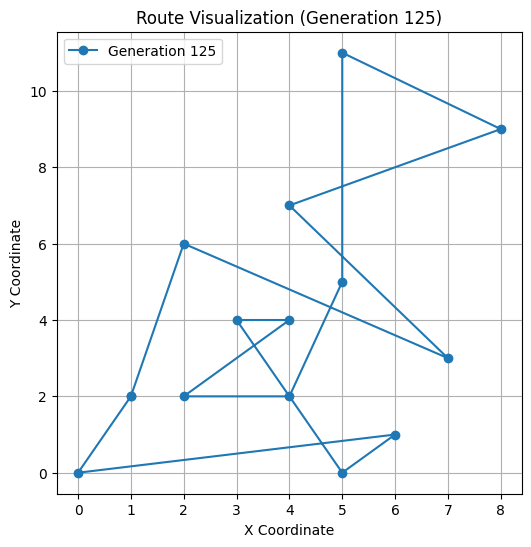

Generation 126: Best Fitness = 53.827946441463666
Generation 127: Best Fitness = 53.763692598584655
Generation 128: Best Fitness = 53.827946441463666
Generation 129: Best Fitness = 53.827946441463666
Generation 130: Best Fitness = 52.22762956101178
Generation 131: Best Fitness = 52.22762956101178
Generation 132: Best Fitness = 55.301242798174
Generation 133: Best Fitness = 55.301242798174
Generation 134: Best Fitness = 51.55394316629332
Generation 135: Best Fitness = 52.971617114346955
Generation 136: Best Fitness = 51.81080146823919
Generation 137: Best Fitness = 54.93300942937351
Generation 138: Best Fitness = 52.24203390435752
Generation 139: Best Fitness = 53.14257283857094
Generation 140: Best Fitness = 55.484150507093844
Generation 141: Best Fitness = 49.53398989976304
Generation 142: Best Fitness = 53.15056376350951
Generation 143: Best Fitness = 48.867784464436625
Generation 144: Best Fitness = 48.867784464436625
Generation 145: Best Fitness = 49.53398989976304
Generation 146: 

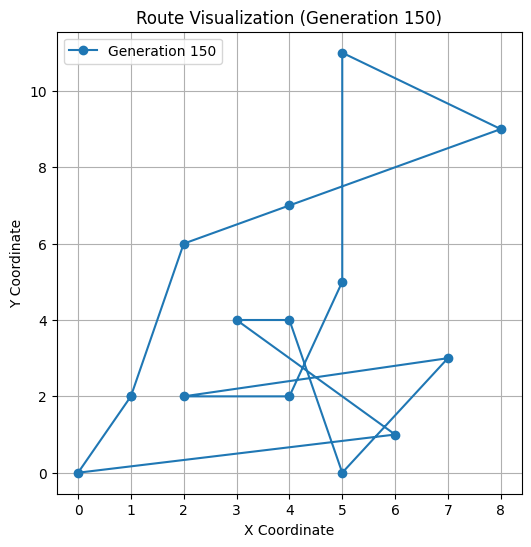

Generation 151: Best Fitness = 50.29959051876306
Generation 152: Best Fitness = 51.82030737003649
Generation 153: Best Fitness = 52.611265292621454
Generation 154: Best Fitness = 44.574135120294585
Generation 155: Best Fitness = 50.333356971586724
Generation 156: Best Fitness = 51.79327376246657
Generation 157: Best Fitness = 51.82030737003649
Generation 158: Best Fitness = 44.32834421975623
Generation 159: Best Fitness = 46.147087070827354
Generation 160: Best Fitness = 50.77708219347614
Generation 161: Best Fitness = 52.06400153841051
Generation 162: Best Fitness = 47.38263346894013
Generation 163: Best Fitness = 47.38263346894013
Generation 164: Best Fitness = 53.87416123510447
Generation 165: Best Fitness = 54.08136687290029
Generation 166: Best Fitness = 50.50467793714027
Generation 167: Best Fitness = 49.07986946311544
Generation 168: Best Fitness = 48.21068756701399
Generation 169: Best Fitness = 48.81347696184045
Generation 170: Best Fitness = 48.42154232559024
Generation 171: 

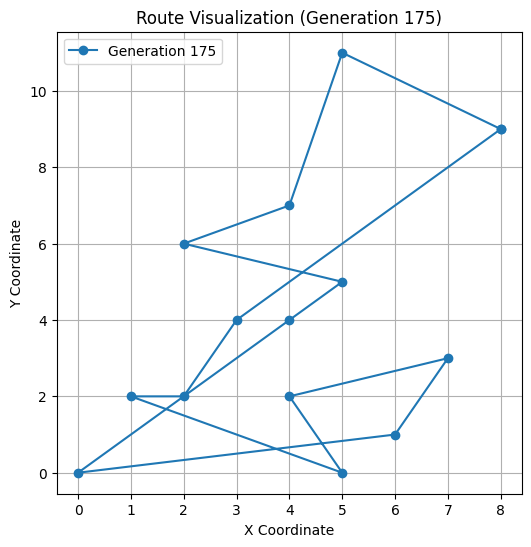

Generation 176: Best Fitness = 51.953107350800906
Generation 177: Best Fitness = 51.953107350800906
Generation 178: Best Fitness = 51.183708575642534
Generation 179: Best Fitness = 51.10349657507986
Generation 180: Best Fitness = 47.25724099466271
Generation 181: Best Fitness = 48.274214898477254
Generation 182: Best Fitness = 46.49153251790128
Generation 183: Best Fitness = 46.49153251790128
Generation 184: Best Fitness = 46.49153251790128
Generation 185: Best Fitness = 45.47455861408673
Generation 186: Best Fitness = 53.56807835796055
Generation 187: Best Fitness = 54.563362304266654
Generation 188: Best Fitness = 53.56807835796055
Generation 189: Best Fitness = 53.80699033637114
Generation 190: Best Fitness = 51.96344596566939
Generation 191: Best Fitness = 52.56630346442007
Generation 192: Best Fitness = 52.56630346442007
Generation 193: Best Fitness = 53.606265908846524
Generation 194: Best Fitness = 54.29731234929126
Generation 195: Best Fitness = 53.62345042858084
Generation 196

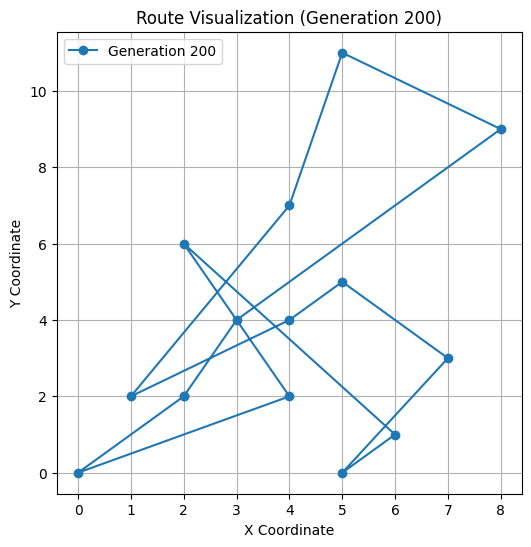

Generation 201: Best Fitness = 53.46417507548527
Generation 202: Best Fitness = 53.46417507548527
Generation 203: Best Fitness = 53.0557174561889
Generation 204: Best Fitness = 50.33095746823941
Generation 205: Best Fitness = 52.83365837344947
Generation 206: Best Fitness = 53.46417507548527
Generation 207: Best Fitness = 52.02008469364689
Generation 208: Best Fitness = 53.46417507548527
Generation 209: Best Fitness = 51.24418561646191
Generation 210: Best Fitness = 52.54109148467472
Generation 211: Best Fitness = 54.258677441245794
Generation 212: Best Fitness = 54.801619054348414
Generation 213: Best Fitness = 55.898485018026705
Generation 214: Best Fitness = 54.37193870796486
Generation 215: Best Fitness = 55.898485018026705
Generation 216: Best Fitness = 55.87736211864085
Generation 217: Best Fitness = 54.64439365312042
Generation 218: Best Fitness = 55.46838417994758
Generation 219: Best Fitness = 48.05353207722821
Generation 220: Best Fitness = 51.4106867224962
Generation 221: Be

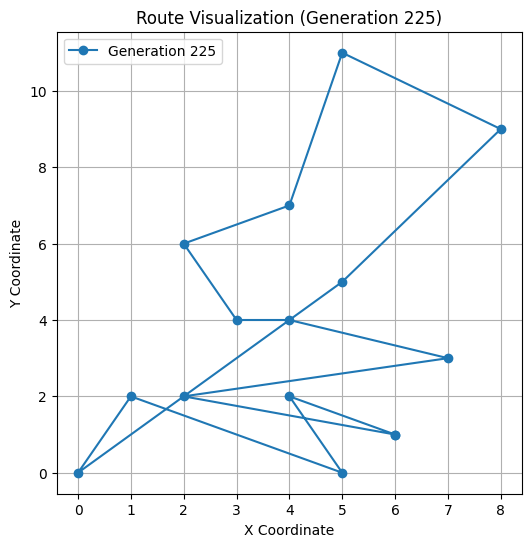

Generation 226: Best Fitness = 53.15035856278784
Generation 227: Best Fitness = 50.185633684206394
Generation 228: Best Fitness = 53.71706829332286
Generation 229: Best Fitness = 50.185633684206394
Generation 230: Best Fitness = 52.133595870454215
Generation 231: Best Fitness = 51.03814692097747
Generation 232: Best Fitness = 52.133595870454215
Generation 233: Best Fitness = 50.59039210358915
Generation 234: Best Fitness = 51.12078091868868
Generation 235: Best Fitness = 49.494943154112406
Generation 236: Best Fitness = 51.90258400686599
Generation 237: Best Fitness = 49.241361774207235
Generation 238: Best Fitness = 48.14591282473049
Generation 239: Best Fitness = 49.241361774207235
Generation 240: Best Fitness = 52.998032956342755
Generation 241: Best Fitness = 51.90258400686599
Generation 242: Best Fitness = 52.998032956342755
Generation 243: Best Fitness = 49.494943154112406
Generation 244: Best Fitness = 49.494943154112406
Generation 245: Best Fitness = 51.90258400686599
Generatio

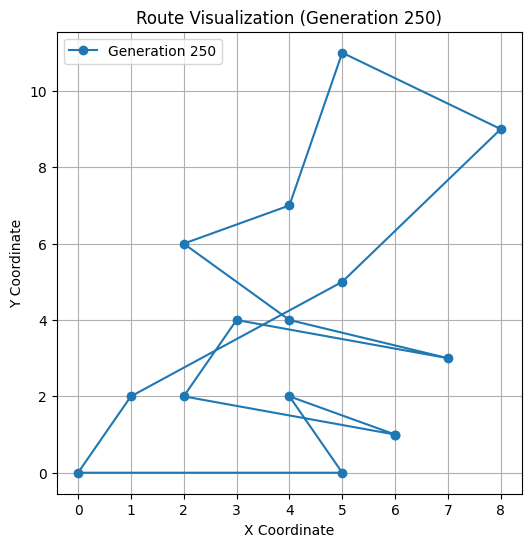

Generation 251: Best Fitness = 48.364467399824896
Generation 252: Best Fitness = 48.364467399824896
Generation 253: Best Fitness = 50.027194346053996
Generation 254: Best Fitness = 53.088359310619225
Generation 255: Best Fitness = 52.78184247330098
Generation 256: Best Fitness = 51.376726390646496
Generation 257: Best Fitness = 52.830404156676394
Generation 258: Best Fitness = 55.46446010857264
Generation 259: Best Fitness = 52.830404156676394
Generation 260: Best Fitness = 55.46446010857264
Generation 261: Best Fitness = 52.930711484697895
Generation 262: Best Fitness = 49.63274564366627
Generation 263: Best Fitness = 53.84428441563917
Generation 264: Best Fitness = 53.937481929684225
Generation 265: Best Fitness = 47.861015815865485
Generation 266: Best Fitness = 43.69354170756799
Generation 267: Best Fitness = 43.69354170756799
Generation 268: Best Fitness = 44.8644264520766
Generation 269: Best Fitness = 41.90005921461862
Generation 270: Best Fitness = 44.697632176587476
Generation

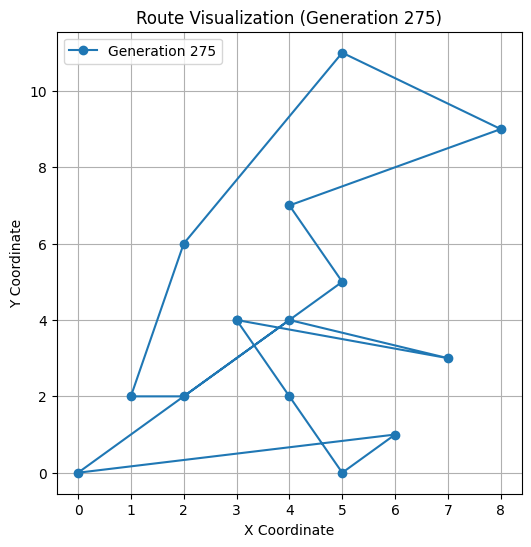

Generation 276: Best Fitness = 52.027388063510685
Generation 277: Best Fitness = 50.703813455531744
Generation 278: Best Fitness = 48.095353987060484
Generation 279: Best Fitness = 52.027388063510685
Generation 280: Best Fitness = 48.11871514865003
Generation 281: Best Fitness = 53.81625172303093
Generation 282: Best Fitness = 52.52275967765117
Generation 283: Best Fitness = 52.58018374553114
Generation 284: Best Fitness = 53.84020496212848
Generation 285: Best Fitness = 52.52275967765117
Generation 286: Best Fitness = 53.84020496212848
Generation 287: Best Fitness = 53.735849694586584
Generation 288: Best Fitness = 54.201141381860495
Generation 289: Best Fitness = 53.699077163383194
Generation 290: Best Fitness = 54.93772965990499
Generation 291: Best Fitness = 55.44826805634655
Generation 292: Best Fitness = 52.58310000732763
Generation 293: Best Fitness = 53.252305813890615
Generation 294: Best Fitness = 53.358392455035876
Generation 295: Best Fitness = 51.98992740156207
Generation 

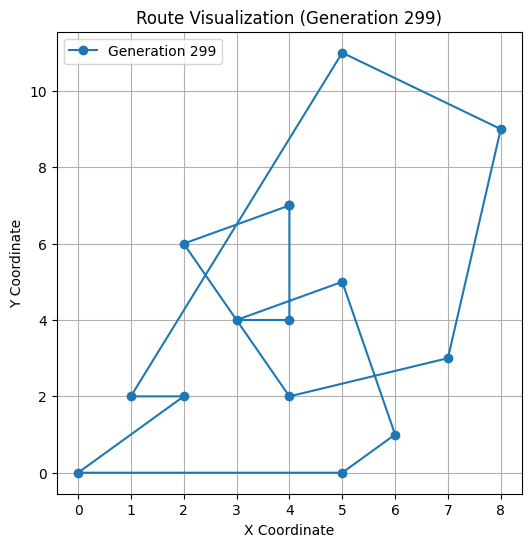

Best Route: [ 3 12  7  2  5  6 13 10  4  8  1  9  0 11]
Best Distance: 41.90005921461862


In [113]:
cities = [
    (0, 0), (1, 2), (3, 4), (6, 1), (5, 5), (2, 6), (4, 7), (7, 3), (4, 4), (2, 2), (8, 9), (4, 2), (5, 0), (5, 11),
]

# Run the Genetic Algorithm
best_route, best_distance = genetic_algorithm(cities, population_size=200, generations=300, mutation_rate=0.1)
print("Best Route:", best_route)
print("Best Distance:", best_distance)

### test 3

Generation 0: Best Fitness = 1033.165370165201


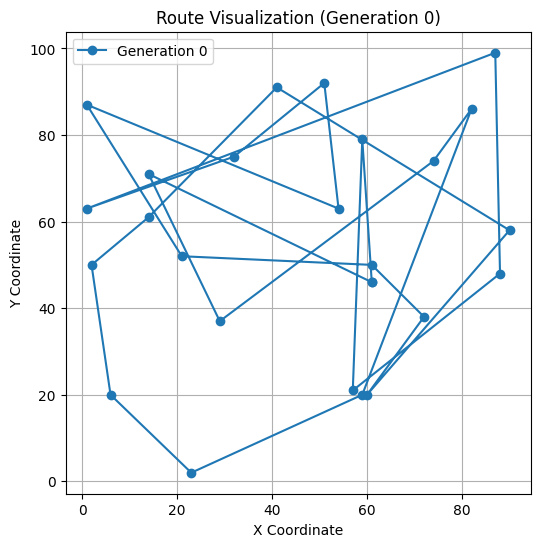

Generation 1: Best Fitness = 925.7576096174763
Generation 2: Best Fitness = 963.2889337848299
Generation 3: Best Fitness = 1026.9187493283323
Generation 4: Best Fitness = 1025.9652425441036
Generation 5: Best Fitness = 1083.2328061534406
Generation 6: Best Fitness = 1004.153921767165
Generation 7: Best Fitness = 1061.6621472053544
Generation 8: Best Fitness = 996.8152268215174
Generation 9: Best Fitness = 1026.4525608501588
Generation 10: Best Fitness = 1025.5231259212737
Generation 11: Best Fitness = 1057.708098847232
Generation 12: Best Fitness = 1021.7956381454829
Generation 13: Best Fitness = 1027.6124648655723
Generation 14: Best Fitness = 1016.127133984278
Generation 15: Best Fitness = 996.2459487648648
Generation 16: Best Fitness = 1056.5809703965263
Generation 17: Best Fitness = 1020.069712397304
Generation 18: Best Fitness = 1003.2257124785601
Generation 19: Best Fitness = 983.2373718137057
Generation 20: Best Fitness = 1036.0190548269907
Generation 21: Best Fitness = 1005.483

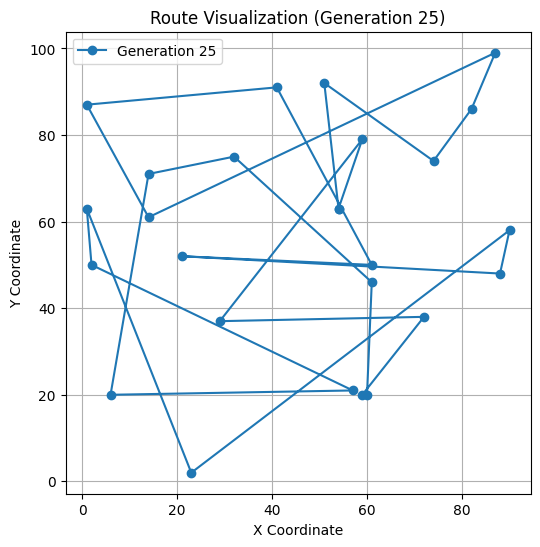

Generation 26: Best Fitness = 1045.395365944017
Generation 27: Best Fitness = 1045.0691201351792
Generation 28: Best Fitness = 1040.1003088914022
Generation 29: Best Fitness = 1029.6648942666252
Generation 30: Best Fitness = 1048.7450708560953
Generation 31: Best Fitness = 1032.3150797618114
Generation 32: Best Fitness = 1029.6648942666252
Generation 33: Best Fitness = 1033.8618038416269
Generation 34: Best Fitness = 1021.1628275009975
Generation 35: Best Fitness = 962.1661621637568
Generation 36: Best Fitness = 1017.0043501488717
Generation 37: Best Fitness = 1020.2395821398441
Generation 38: Best Fitness = 1020.2395821398441
Generation 39: Best Fitness = 1058.6170366084207
Generation 40: Best Fitness = 1034.3762964610476
Generation 41: Best Fitness = 1050.7951422124786
Generation 42: Best Fitness = 1016.076321408974
Generation 43: Best Fitness = 1024.3887957015254
Generation 44: Best Fitness = 970.5384177915406
Generation 45: Best Fitness = 930.5795919767775
Generation 46: Best Fitne

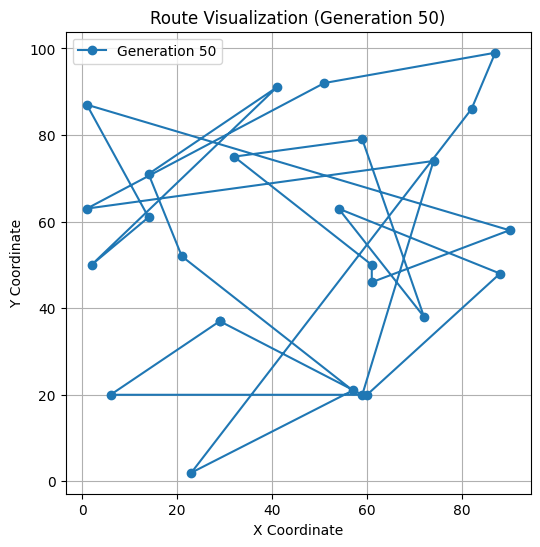

Generation 51: Best Fitness = 1037.3565776071857
Generation 52: Best Fitness = 1017.1617658320587
Generation 53: Best Fitness = 1028.5774872662864
Generation 54: Best Fitness = 1017.1617658320587
Generation 55: Best Fitness = 1028.4574046643904
Generation 56: Best Fitness = 1041.3977227158318
Generation 57: Best Fitness = 1089.4389599875929
Generation 58: Best Fitness = 1046.5709232525255
Generation 59: Best Fitness = 1042.345673083074
Generation 60: Best Fitness = 1050.2468739734418
Generation 61: Best Fitness = 1050.2468739734418
Generation 62: Best Fitness = 1086.354878954674
Generation 63: Best Fitness = 1065.508330124848
Generation 64: Best Fitness = 1042.0971352121633
Generation 65: Best Fitness = 1055.1785654258845
Generation 66: Best Fitness = 1090.7179881478046
Generation 67: Best Fitness = 1042.2236754519695
Generation 68: Best Fitness = 1007.8385163888508
Generation 69: Best Fitness = 1033.606873920261
Generation 70: Best Fitness = 1018.8275379531863
Generation 71: Best Fitn

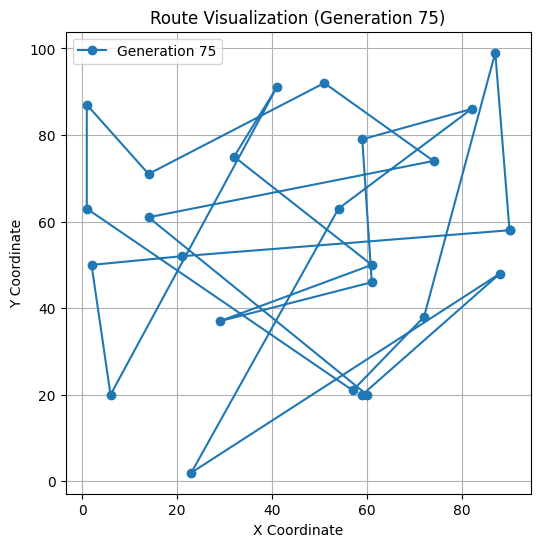

Generation 76: Best Fitness = 1050.1705360541287
Generation 77: Best Fitness = 1047.5262345416427
Generation 78: Best Fitness = 993.634125721338
Generation 79: Best Fitness = 1002.3516852356704
Generation 80: Best Fitness = 1038.698413683068
Generation 81: Best Fitness = 1022.6463963612865
Generation 82: Best Fitness = 1029.7531865552833
Generation 83: Best Fitness = 1069.1387203596114
Generation 84: Best Fitness = 1061.1427682689348
Generation 85: Best Fitness = 1037.8724609469305
Generation 86: Best Fitness = 1088.0653290273258
Generation 87: Best Fitness = 1033.5666858830866
Generation 88: Best Fitness = 1033.709724225804
Generation 89: Best Fitness = 1046.938299978513
Generation 90: Best Fitness = 1033.709724225804
Generation 91: Best Fitness = 1056.9232227868374
Generation 92: Best Fitness = 1027.3186012032363
Generation 93: Best Fitness = 1043.7630134284736
Generation 94: Best Fitness = 1040.0870627075574
Generation 95: Best Fitness = 1050.342949843617
Generation 96: Best Fitness

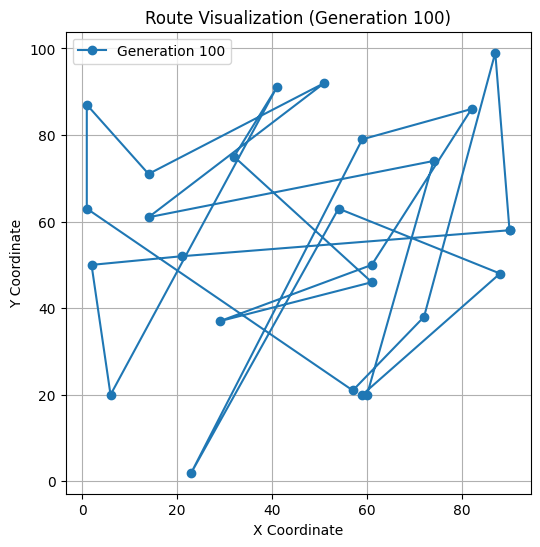

Generation 101: Best Fitness = 1055.9358166198153
Generation 102: Best Fitness = 1045.5359183453097
Generation 103: Best Fitness = 1032.765025487918
Generation 104: Best Fitness = 1030.0201576512914
Generation 105: Best Fitness = 998.1175588662643
Generation 106: Best Fitness = 961.0927923312437
Generation 107: Best Fitness = 1048.3739215022476
Generation 108: Best Fitness = 1061.4041759338534
Generation 109: Best Fitness = 1072.5696954591633
Generation 110: Best Fitness = 1058.7638924335615
Generation 111: Best Fitness = 991.6292872907092
Generation 112: Best Fitness = 1077.455846402091
Generation 113: Best Fitness = 1061.4041759338534
Generation 114: Best Fitness = 1035.1567489188456
Generation 115: Best Fitness = 1031.3695031932252
Generation 116: Best Fitness = 1023.4683023028575
Generation 117: Best Fitness = 1038.864347574457
Generation 118: Best Fitness = 1036.4501388162319
Generation 119: Best Fitness = 992.6596664349962
Generation 120: Best Fitness = 1023.7978959448096
Generat

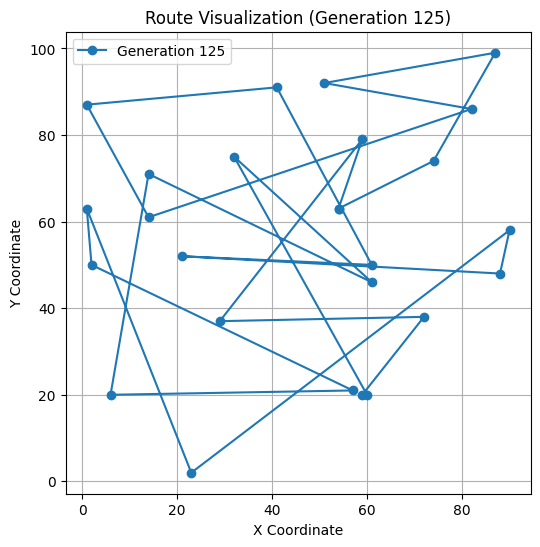

Generation 126: Best Fitness = 1044.7221797310876
Generation 127: Best Fitness = 1074.7098770383673
Generation 128: Best Fitness = 1038.8340878934698
Generation 129: Best Fitness = 1110.2829079471342
Generation 130: Best Fitness = 1047.5262345416427
Generation 131: Best Fitness = 1004.7406505570056
Generation 132: Best Fitness = 1092.0699855673392
Generation 133: Best Fitness = 1086.5692787938012
Generation 134: Best Fitness = 1078.8695994516622
Generation 135: Best Fitness = 1030.7148135018224
Generation 136: Best Fitness = 1030.5090080884156
Generation 137: Best Fitness = 1038.1699078151516
Generation 138: Best Fitness = 1087.5436411751093
Generation 139: Best Fitness = 1012.2531087139779
Generation 140: Best Fitness = 1098.643871377435
Generation 141: Best Fitness = 1033.4049885639904
Generation 142: Best Fitness = 1073.516694638037
Generation 143: Best Fitness = 1084.3267602746284
Generation 144: Best Fitness = 1063.2479172333658
Generation 145: Best Fitness = 1067.0979650999031
Ge

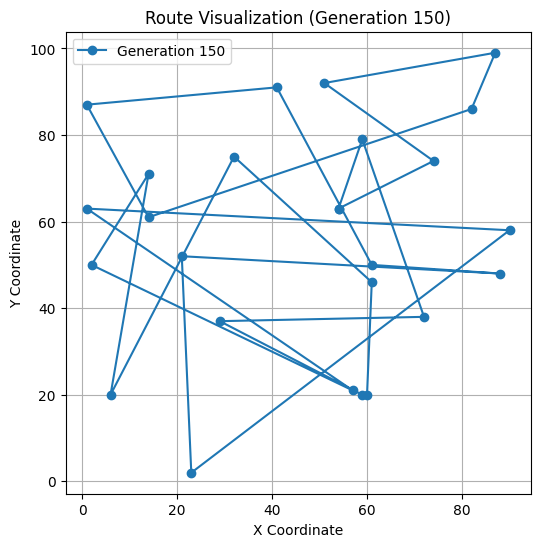

Generation 151: Best Fitness = 1071.240651385207
Generation 152: Best Fitness = 1048.4703928249885
Generation 153: Best Fitness = 1037.9990011867365
Generation 154: Best Fitness = 1037.8724609469305
Generation 155: Best Fitness = 1039.5009253023093
Generation 156: Best Fitness = 1039.5009253023093
Generation 157: Best Fitness = 1033.4049885639904
Generation 158: Best Fitness = 1077.1391312690985
Generation 159: Best Fitness = 1043.754427712713
Generation 160: Best Fitness = 1045.1642062386481
Generation 161: Best Fitness = 1095.0541499522394
Generation 162: Best Fitness = 1009.9789573025674
Generation 163: Best Fitness = 1045.0376659988424
Generation 164: Best Fitness = 1065.138346233571
Generation 165: Best Fitness = 1071.9455839849572
Generation 166: Best Fitness = 1044.3311931976182
Generation 167: Best Fitness = 1013.0650399018625
Generation 168: Best Fitness = 996.4462794971624
Generation 169: Best Fitness = 1040.3015576334024
Generation 170: Best Fitness = 1044.4127989534086
Gene

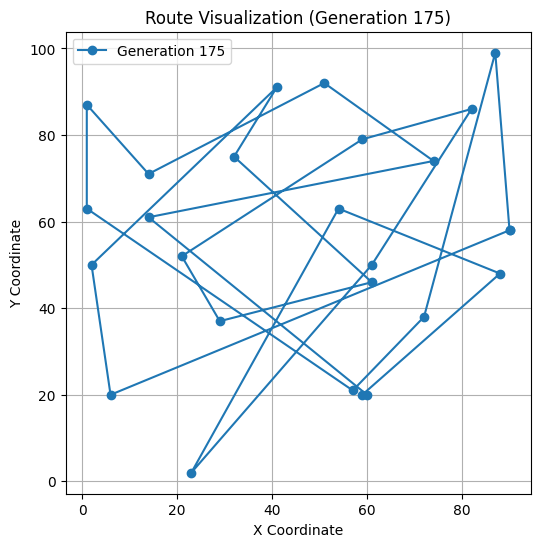

Generation 176: Best Fitness = 1049.1832097201325
Generation 177: Best Fitness = 1045.0881512934916
Generation 178: Best Fitness = 1002.1080700673798
Generation 179: Best Fitness = 1018.6046881868853
Generation 180: Best Fitness = 989.8037499549358
Generation 181: Best Fitness = 1018.0853955783878
Generation 182: Best Fitness = 1045.33020603101
Generation 183: Best Fitness = 1078.818906669305
Generation 184: Best Fitness = 1059.5491307944312
Generation 185: Best Fitness = 1038.3448360581863
Generation 186: Best Fitness = 1066.5679451455142
Generation 187: Best Fitness = 1039.6783056038873
Generation 188: Best Fitness = 1018.0853955783878
Generation 189: Best Fitness = 1033.2868156376878
Generation 190: Best Fitness = 1039.012687738489
Generation 191: Best Fitness = 1018.6046881868853
Generation 192: Best Fitness = 1056.723842157931
Generation 193: Best Fitness = 1053.432784858133
Generation 194: Best Fitness = 1048.102459706309
Generation 195: Best Fitness = 1048.102459706309
Generatio

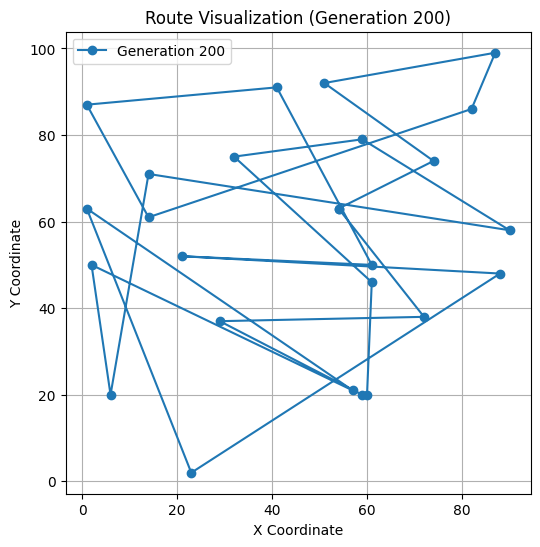

Generation 201: Best Fitness = 1018.6046881868853
Generation 202: Best Fitness = 1065.8747385982288
Generation 203: Best Fitness = 1037.637781951542
Generation 204: Best Fitness = 1039.012687738489
Generation 205: Best Fitness = 1061.1725844061084
Generation 206: Best Fitness = 1013.0650399018625
Generation 207: Best Fitness = 1033.8176970884347
Generation 208: Best Fitness = 1040.2929186998274
Generation 209: Best Fitness = 1047.730247252821
Generation 210: Best Fitness = 1046.3553414658743
Generation 211: Best Fitness = 1039.3405994701598
Generation 212: Best Fitness = 996.7741912288333
Generation 213: Best Fitness = 1012.1785810072093
Generation 214: Best Fitness = 1064.1855059359132
Generation 215: Best Fitness = 1013.3929516335332
Generation 216: Best Fitness = 1067.1705506486499
Generation 217: Best Fitness = 1067.5806790504435
Generation 218: Best Fitness = 1067.1705506486499
Generation 219: Best Fitness = 1065.2881271477818
Generation 220: Best Fitness = 1091.460985077263
Gener

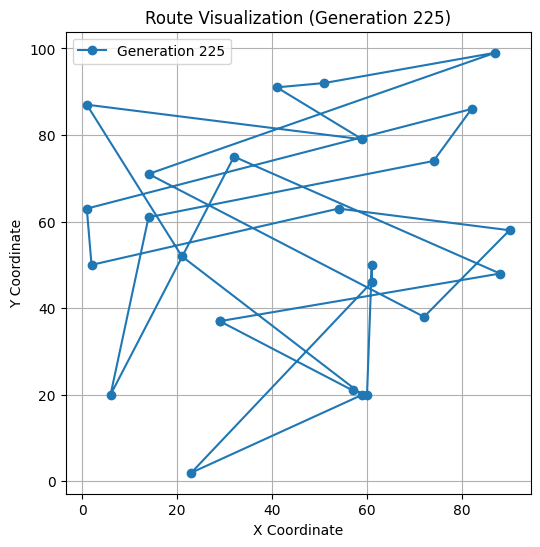

Generation 226: Best Fitness = 1089.5111106065392
Generation 227: Best Fitness = 1048.6619635168367
Generation 228: Best Fitness = 1078.0204317956627
Generation 229: Best Fitness = 1057.7479122766015
Generation 230: Best Fitness = 1061.897883029819
Generation 231: Best Fitness = 1036.3160321362993
Generation 232: Best Fitness = 1078.4171158033919
Generation 233: Best Fitness = 1031.7340382285254
Generation 234: Best Fitness = 1047.1659132833122
Generation 235: Best Fitness = 1032.7388613076585
Generation 236: Best Fitness = 1039.8418834392164
Generation 237: Best Fitness = 1032.7388613076585
Generation 238: Best Fitness = 1045.33020603101
Generation 239: Best Fitness = 1061.640760020937
Generation 240: Best Fitness = 1081.2986743228903
Generation 241: Best Fitness = 1028.0503972443896
Generation 242: Best Fitness = 1021.2327300902241
Generation 243: Best Fitness = 1086.245877704987
Generation 244: Best Fitness = 1056.8393633892767
Generation 245: Best Fitness = 1056.8393633892767
Gener

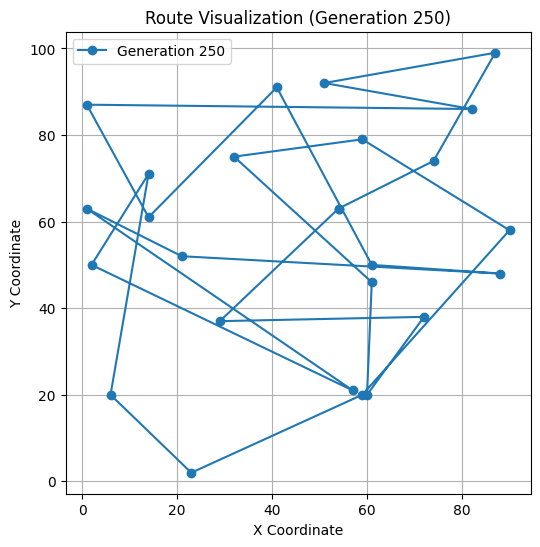

Generation 251: Best Fitness = 1020.149196354022
Generation 252: Best Fitness = 1021.2123388477777
Generation 253: Best Fitness = 1052.2634536722633
Generation 254: Best Fitness = 1062.0093544185168
Generation 255: Best Fitness = 1038.4087870188557
Generation 256: Best Fitness = 1028.3094593444227
Generation 257: Best Fitness = 1036.767956758722
Generation 258: Best Fitness = 1078.3517290426848
Generation 259: Best Fitness = 1028.4294964123421
Generation 260: Best Fitness = 970.6363669364301
Generation 261: Best Fitness = 992.5014871943763
Generation 262: Best Fitness = 1021.6712951006767
Generation 263: Best Fitness = 1047.1930957981235
Generation 264: Best Fitness = 1008.6630333099808
Generation 265: Best Fitness = 1011.5354387427651
Generation 266: Best Fitness = 1021.2123388477777
Generation 267: Best Fitness = 999.9152786248114
Generation 268: Best Fitness = 1053.8247153645077
Generation 269: Best Fitness = 1048.6779661053881
Generation 270: Best Fitness = 1048.6409092345875
Gener

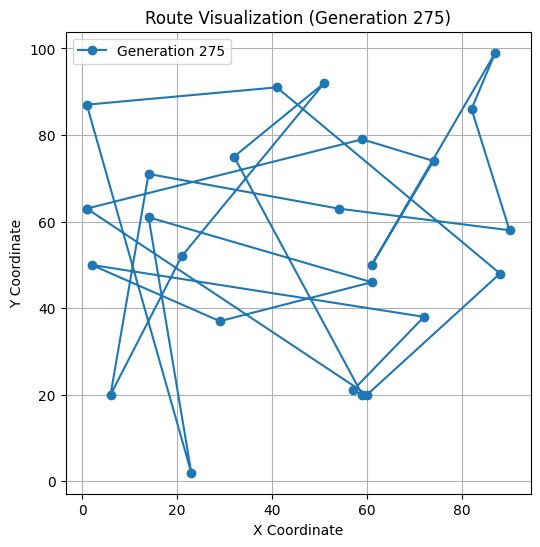

Generation 276: Best Fitness = 1060.4067693891957
Generation 277: Best Fitness = 1062.8919646702714
Generation 278: Best Fitness = 1010.629155400544
Generation 279: Best Fitness = 995.1972803457575
Generation 280: Best Fitness = 1010.629155400544
Generation 281: Best Fitness = 980.9942833053509
Generation 282: Best Fitness = 981.1694209172899
Generation 283: Best Fitness = 1097.7317379622382
Generation 284: Best Fitness = 1070.2361691789517
Generation 285: Best Fitness = 1046.1497096482326
Generation 286: Best Fitness = 1046.1497096482326
Generation 287: Best Fitness = 938.6400465805449
Generation 288: Best Fitness = 1057.562096675107
Generation 289: Best Fitness = 1063.6608610397927
Generation 290: Best Fitness = 1033.7723622133763
Generation 291: Best Fitness = 1081.6973675628506
Generation 292: Best Fitness = 1081.7505900810952
Generation 293: Best Fitness = 1049.968028356186
Generation 294: Best Fitness = 1019.8962600509581
Generation 295: Best Fitness = 1009.9504155889922
Generati

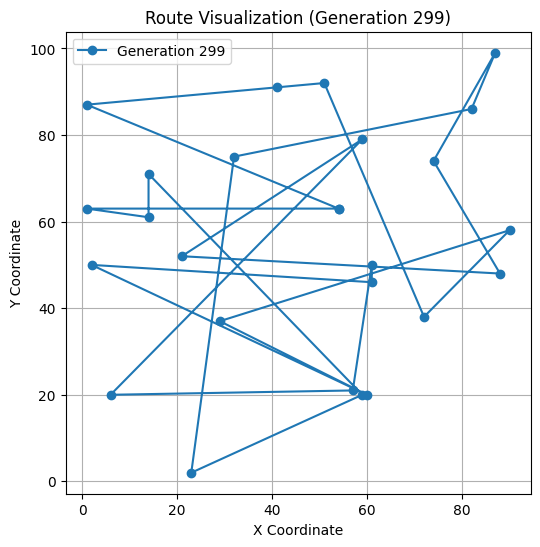

Best Route: [21 17  9  4  3 11  6 23 22 18 16 15  2 24 20  7  8  0  1 10 12  5 14 13
 19]
Best Distance: 925.7576096174763


In [108]:
np.random.seed(42)  # For reproducibility
cities = [(np.random.randint(0, 100), np.random.randint(0, 100)) for _ in range(25)]

# Run the Genetic Algorithm
best_route, best_distance = genetic_algorithm(cities, generations=300)
print("Best Route:", best_route)
print("Best Distance:", best_distance)

## Analysis

Test with various mutation rates, population sizes, and generations to analyze the impact on results. Then analyze and express the effect of each parameter.

*answer*

در تست دوم, یک تست جدید اضافه کرده ایم. اولا که زمانی که نرخ جهش خیلی کم یا در حد 0.01 باشد تقریبا هیج موقع اتفاق نمی افتد و زمانی که آن را به 0.1 افزایش دادیم نتیجه بهتر شد. حال زمانی که تعداد نسل ها را افزایش میدهیم و اندازه جمعیت را نیز, طبیعی است که میتواند الگوریتم بهتر پیشروی کند چرا که تکرار ها بیشتر شده و شانس این هست که باز به جواب بهتری برسیم و همچنین اندازه بیشتر است و ما راه حل های بیشتری را دیده ایم. همانطور که میبینید نتیجه بهتر شده به اندازه 4 درصد. اما لزوما این اتفاق نمی افتد.